# Лабораторная работа 1 (Регрессионный анализ)

Цель: научится применять модели линейной регресси библиотеки scikit-learn к набору эмпирических данных

Дано: сsv-файл

Результат: эмпирическая формула

Ход выполнения: 
1. Загрузить данные из файла.
2. Визуализировать загруженные данные (диаграмма рассеяния, график).
3. Разбить данные на обучающую и тестовую выборки.
4. Выбрать модель регрессии.
5. Обучить модель регрессии на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib.pylab
# %pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pylab as plt

Загружаем датасет

In [3]:
data = pd.read_csv('lab1-07.csv', header=None)

Строю диаграмму рассеивания по своим данным

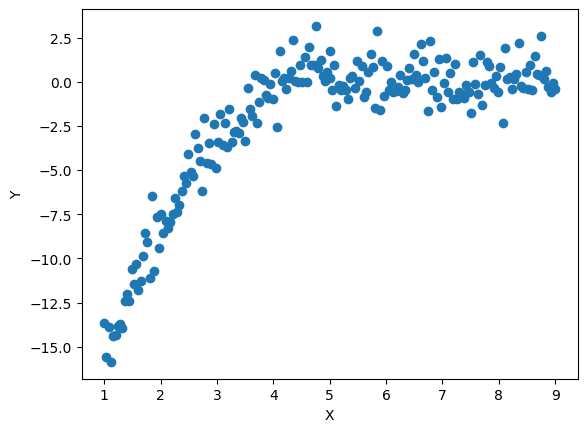

In [4]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x=data[0], y=data[1])
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Разбиваю датасет на обучающую и тестовую выборку

In [6]:
x_data = np.array(data.iloc[:, 0]).reshape((-1, 1))
y_data = np.array(data.iloc[:, 1])

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.25, random_state=True)

Тестово используем линейную регрессию для сравнения

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_data_train, y_data_train)

Проверяем точность модели на тестовой выборке

In [8]:
model.score(x_data_test, y_data_test)

0.5909541254999142

Ради интереса попробую остальные виды регрессий, процесс обучения происходит очень быстро, поэтому в данном случае можно использовать полный перебор коэффициентов для максимизации точности модели.
Также сразу проверим на точность

In [9]:
from sklearn.linear_model import Ridge

optimal_k, max_accuracy = -1, -1

for k in range(0, 10):
    accuracy = Ridge(alpha=k/10).fit(x_data_train, y_data_train).score(x_data_test, y_data_test)
    if accuracy > max_accuracy:
        optimal_k = k/10
        max_accuracy = accuracy

optimal_k, max_accuracy


(0.9, 0.5910404624703223)

In [10]:
from sklearn.linear_model import Lasso

optimal_k, max_accuracy = -1, -1

for k in range(1, 10):
    accuracy = Lasso(alpha=k/10).fit(x_data_train, y_data_train).score(x_data_test, y_data_test)
    if accuracy > max_accuracy:
        optimal_k = k/10
        max_accuracy = accuracy

optimal_k, max_accuracy

(0.4, 0.5931881760884463)

In [11]:
from sklearn.linear_model import ElasticNet

optimal_alpha, optimal_l1_ratio, max_accuracy = -1, -1, -1

for alpha in range(1, 10):
    for l1_ratio in range(1, 10):
        accuracy = ElasticNet(alpha=alpha/10, l1_ratio=l1_ratio/10).fit(x_data_train, y_data_train).score(x_data_test, y_data_test)
        if accuracy > max_accuracy:
            optimal_alpha = l1_ratio/10
            optimal_l1_ratio = l1_ratio/10
            max_accuracy = accuracy

optimal_alpha, optimal_l1_ratio, max_accuracy

(0.7, 0.7, 0.593209041390264)

Наибольшую точность предсказания показала модель ElasticNet, сделаем визуализацию сравнения предсказанных результатов и фактических результатов тестовой выборки

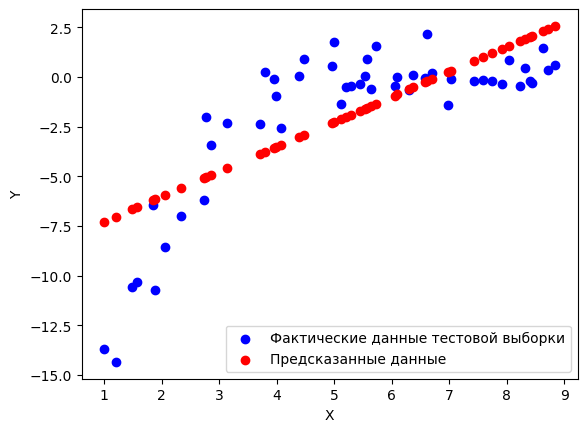

In [12]:
model_elastic = ElasticNet(alpha=alpha/10, l1_ratio=l1_ratio/10).fit(x_data_train, y_data_train)

y_test_pred = model_elastic.predict(x_data_test)
plt.scatter(x_data_test, y_data_test, color='blue', label='Фактические данные тестовой выборки')
plt.scatter(x_data_test, y_test_pred, color='red', label='Предсказанные данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

По графику видно, что модель крайне посредственно предсказывает результаты, поскольку, как видно из диаграммы рассеивания, данные распределы не линейно. Попробуем использовать для более точного предсказания полилиненую регрессию.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)

x_poly_train = poly.fit_transform(x_data_train)
x_poly_test = poly.fit_transform(x_data_test)

model = LinearRegression()
model.fit(x_poly_train, y_data_train)

model.score(x_poly_test, y_data_test)


0.9271901901790922

Отображаю график предсказаний и фактических результатов тестовой выборки для полилинейной модели

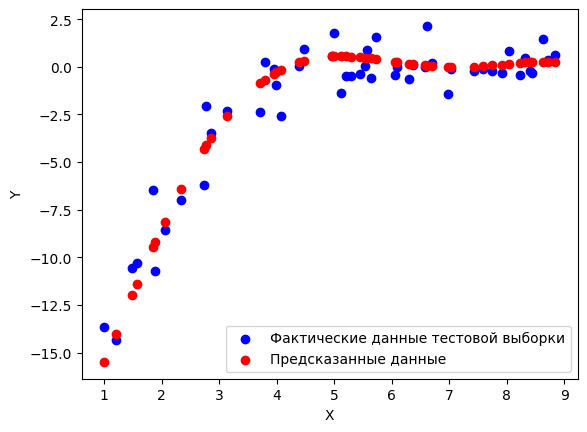

In [14]:
y_test_pred = model.predict(x_poly_test)
plt.scatter(x_data_test, y_data_test, color='blue', label='Фактические данные тестовой выборки')
plt.scatter(x_data_test, y_test_pred, color='red', label='Предсказанные данные')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

В данном случае мы видим, что предсказания достаточно хорошо каррелируют с тестовой выборкой, следовательно модель подобрана правильно. Максимальная точность предсказания, которую удалось добиться равна 0.927190.